In [3]:



#Create a Client Object:

#lidar




In [4]:
!python -m pip install tdmclient

NameError: name 'node' is not defined

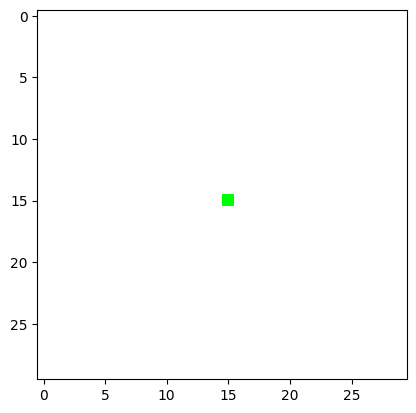

: 

In [ ]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt 


## make  a numpy array of shape 300,300,3 to represent a cost map
cost_map = np.zeros((30,30,3),dtype=np.uint8)
#make everything white
cost_map[:,:,:] = (255,255,255)

cost_map[15,15] = (0,255,0)

#set center map to 1

#set the border of the map to 1
#show map

plt.imshow(cost_map)
await node.wait_for_variables({"prox.horizontal"})

#5cm == 1455
#2cm == 2685
#0 cm == 4003
#FIXME: Magic number
ratio = 5/(4003-1455)

# Sensor angles in degrees


print(ratio*(4003-2685))

#update cost map (each block is 1cm)
#return a list of tuples of (dist float,angle float) (impose type)



    



In [ ]:

def getObstaclePosition() -> list:
    """
    Calculates the positions of obstacles based on sensor readings.
    The function iterates through 7 sensors, calculates the distance and angle
    for each sensor, and appends the position to a list. If the distance is greater
    than 5, it appends (-1, 0) to indicate no obstacle detected within the threshold.
    Returns:
        list of tuples: A list of tuples where each tuple contains the distance (float)
                        and angle (float) of the detected obstacle.
    """
    pos = []
    for i in range(7):
        ##if 2 sensors are close to each other link the 2 dots
        aw(node.wait_for_variables({"prox.horizontal"}))
        aw(client.sleep(0.01))
        prox=node.v.prox.horizontal
        angle = sensor_angles[list(sensor_angles.keys())[i]]
        distance = ratio*(4003-list(prox)[i])
        if distance > 5:
            pos.append((-1,0))
        else:
            pos.append((distance,angle))
        
     
    return pos

In [1]:
   
import Thymio as th

thymion = th.Thymio()
await thymion.initiateLock()
thymion.wait_for_variables(["motor.left.speed"])
test = thymion.getSpeedL()

    
    

In [2]:
print(test)

-2.0684455555555554


In [ ]:
import vision.detect_aruco as da
import threading
import queue
import cv2
import time
import matplotlib.pyplot as plt
qpos = queue.Queue(maxsize=2)
qimg = queue.Queue(maxsize=2)
qresult = queue.Queue(maxsize=2)
random_path = [(0,0), (100,100), (200,100), (300,300), (400,400), (500,500), (600,600), (700,700), (800,800), (900,900), (1000,1000)]
def draw_path(img, path):
    for i in range(len(path)-1):
        cv2.line(img, path[i], path[i+1], (0, 255, 0), 2)
    return img
#start the thread
t = threading.Thread(target=da.main,args=(qpos,qimg,qresult))
t.start()

while True:
    img = qimg.get()
    draw_path(img, random_path)
    cv2.imshow("aruco", img)
    cv2.waitKey(1)  # Add a short delay to refresh the window
    pos =qpos.get()
    result = qresult.get()
    print(img.shape,result, end="\r")
    if result == False:
        break
t.join()

Exception in thread Thread-5 (main):
Traceback (most recent call last):
  File "c:\Program Files\Python312\Lib\threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "C:\Users\neilc\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 761, in run_closure
    _threading_Thread_run(self)
  File "c:\Program Files\Python312\Lib\threading.py", line 1010, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\neilc\OneDrive\Bureau\Exercises_mobile\mobileRobt38\vision\detect_aruco.py", line 78, in main
    frame = cv2.resize(frame, (1280, 720))
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
cv2.error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



[INFO] detecting 'DICT_ARUCO_ORIGINAL' markers...


In [3]:
import cv2
cap = cv2.VideoCapture(0)


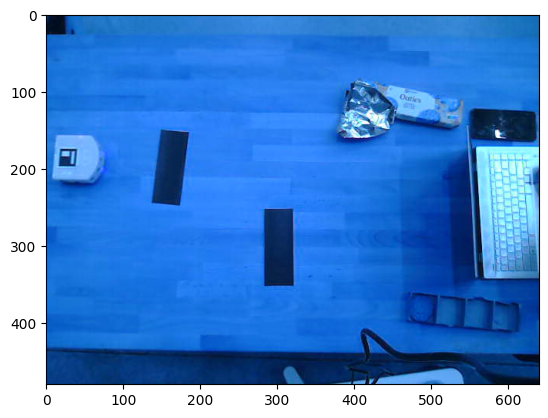

In [4]:
import matplotlib.pyplot as plt

_,img =cap.read()




In [ ]:
import cv2
import matplotlib.pyplot as plt

# Try setting a high resolution

cap = cv2.VideoCapture(1)  # Replace 3 with the correct index
print("Setting resolution to 1920x1080")
# Try setting a high resolution
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)
print("Resolution set to: (" + str(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) + ", " + str(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)) + ")")


if cap.isOpened():
    print("Camera successfully opened!")
else:
    print("Failed to open the camera.")





Setting resolution to 1920x1080
Resolution set to: (1920.0, 1080.0)
Camera successfully opened!


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Try setting a high resolution

cap = cv2.VideoCapture(1)  # Replace 3 with the correct index
print("Setting resolution to 1920x1080")
# Try setting a high resolution
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)
print("Resolution set to: (" + str(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) + ", " + str(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)) + ")")




True

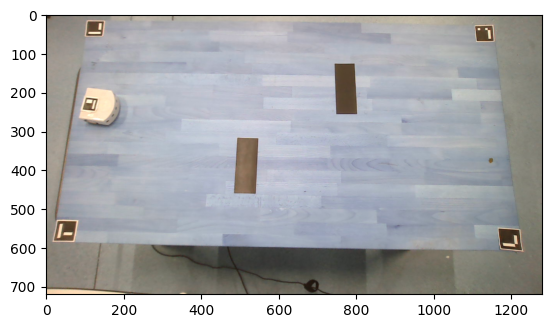

In [ ]:
cap.set(15,-6)
ret,frame =cap.read()
plt.imshow(frame)
cv2.imwrite("table.jpg",frame)

frame =cap.read()
plt.imshow(frame)

In [3]:
#each time I press enter I get a new frame from the camera and save it as a jpg file
i=0
while True:
    ret, frame = cap.read()
    cv2.imshow("frame", frame)
    if cv2.waitKey(1) & 0xFF == ord('\r'):
        cv2.imwrite(f"frame{i}.jpg", frame)
        i+=1
        




    

KeyboardInterrupt: 

In [9]:

import json
import cv2
import numpy as np
with open('./vision/camera_calibration.json', 'r') as file:
    params = json.load(file)
    
camera_matrix = np.array(params["camera_matrix"], dtype=np.float32)
dist_coeffs = np.array(params["distortion_coefficients"], dtype=np.float32)

img = cv2.imread('./vision/checkerboard_images/frame30.jpg')
h,  w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(camera_matrix, dist_coeffs, (w,h), 1, (w,h))

# undistort
dst = cv2.undistort(img, camera_matrix, dist_coeffs, None, newcameramtx)
 
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult1.jpeg',dst)

print("dst:", dst.shape)
cv2.imshow('calibresult', dst)




    

dst: (700, 1259, 3)


In [ ]:
import cv2
print(cv2.__version__)

4.10.0
